# 1 Encuentra el espectro de potencias en 1d, 2d y 3d para la función de correlación

## <center> $\xi(r)=\left(\frac{r}{r_0}\right)^{-\gamma}$ </center>

In [1]:
# Aqui cargamos las liberias a usar
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.special
import numpy as np
import cmath
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
from mpl_toolkits import mplot3d
import math

#### Cargamos todas las funciones necesarias de los ejercicios anteriores

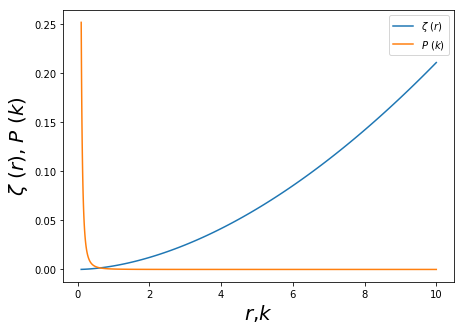

In [2]:
def construyecaja (l, s):
    nxlado = int(l / s)
    ntot = nxlado ** 2
    px = []
    py = []
    c = 1
    for i in range(1, nxlado):
        for j in range(1, nxlado):
            px.append(s * i)
            py.append(s * j)
            c += 1
    return px, py


## 1DIMENSION
j=complex(0,1) # Se define el vector complejo, (0,1)
x=np.linspace(10,0.1,100)
y=(x**1.77)/5.4
k=1./x
kp=j*(2.5928)*(14.0015/(2*math.pi)**2.77)
p=2.0*(k/kp)**(-2.77)
v=np.linalg.norm(y)
u=np.linalg.norm(abs(p))
plt.figure(figsize=(7,5))
plt.plot(x,y/v,'-' ,label='$\zeta$ $(r)$')
plt.plot(k,abs(p)/u,'-' ,label='$P$ $(k)$')
plt.xlabel("$r$,$k$",fontsize = 20)   # Establece el título del eje x
plt.ylabel("$\zeta$ $(r)$, $P$ $(k)$",fontsize = 20)   # Establece el título del eje y
plt.legend()
plt.autoscale
#plt.yscale('log')
#plt.xscale('log')
plt.show()

def distancia(x1,y1):
    d = []
    i=0
    while i <= (len(x1) - 1):
        j = (i + 1)
        while j < len(x1):
            d.append(pow(((x1[i] - x1[j]) ** 2 + (y1[i] - y1[j]) ** 2), 0.5))
            j = j + 1
        i= i + 1
    return d

def distanciadr(x1,y1, xr, yr):
    d = []
    i=0
    while i <= (len(x1) - 1):
        j = (i + 1)
        while j < len(x1):
            d.append(pow(((x1[i] - xr[j]) ** 2 + (y1[i] - yr[j]) ** 2), 0.5))
            j = j + 1
        i= i + 1
    return d

def fham(xm, ym, xr, yr, lcaja, nb, l1, l2): # Hamilton
    lmax = np.sqrt(2 * lcaja ** 2)  
    dmalla = []
    drandom = []
    co = []
    
    dmalla = distancia(xm, ym) 
    drandom = distancia(xr, yr) 
    ddr = distanciadr(xm, ym, xr, yr) 
    
    dd, nbm = np.histogram(dmalla, bins = nb)
    rr, nbr = np.histogram(drandom, bins = nb)
    dr, nbrd = np.histogram(ddr, bins = nb)
    
    hprom = (dd + rr + dr) / 3
    
    co = np.abs(dd * rr) / (dr ** 2) - 1 

    x = np.linspace(0, lmax, len(co))
    l1 = lmax/nb/2
    l2 = lmax - lmax/nb/2
    
    xp = np.linspace(l1, l2, nb)
    
    
    plt.figure()
    plt.figure(figsize=(15,5))
    plt.bar(xp, hprom, lmax/nb, label='$PromedioDeHistogramas$', color = 'r')
    plt.legend()
    
    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x, co, 'bo-', label='$Hamilton$', color = 'r')
    plt.legend()
    plt.xlim(l1, l2)
    return co
    
def fpeha(xm, ym, xr, yr, lcaja, nb, l1, l2): # Peebles - Hauser
    lmax = np.sqrt(2 * lcaja ** 2)  
    nrd = len(xr)
    n = len(xm)
    dmalla = []
    drandom = []
    co = []
    
    dmalla = distancia(xm, ym) 
    drandom = distancia(xr, yr) 
    
    dd, nbm = np.histogram(dmalla, bins = nb)
    rr, nbr = np.histogram(drandom, bins = nb)
    
    hprom = (dd + rr)/2
    
    
    co = (nrd / n) ** 2 * (dd / rr) - 1 

    x = np.linspace(0, lmax, len(co))
    l1 = lmax/nb/2
    l2 = lmax - lmax/nb/2
    
    xp = np.linspace(l1, l2, nb)
    
    plt.figure()
    plt.figure(figsize=(15,5))
    plt.bar(xp, hprom, lmax/nb, label='$PromedioDeHistogramas$', color = 'g')
    plt.legend()

    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x, co, 'bo-', label='$Peebles - Hauser$', color = 'g')
    plt.legend()
    plt.xlim(l1, l2)
    return co
    
def fdape(xm, ym, xr, yr, lcaja, nb, l1, l2): # Davis - Peebles
    lmax = np.sqrt(2 * lcaja ** 2)  
    nrd = len(xr)
    n = len(xm)
    dmalla = []
    drandom = []
    co = []
    
    dmalla = distancia(xm, ym) 
    ddr = distanciadr(xm, ym, xr, yr) 
    
    dd, nbm = np.histogram(dmalla, bins = nb)
    dr, nbrd = np.histogram(ddr, bins = nb)
    
    hprom = (dd + dr)/2
    
    co = (nrd / n) * (dd / dr) - 1
    x = np.linspace(0, lmax, len(co))
    l1 = lmax/nb/2
    l2 = lmax - lmax/nb/2
    
    xp = np.linspace(l1, l2, nb)
    
    
    plt.figure()
    plt.figure(figsize=(15,5))
    plt.bar(xp, hprom, lmax/nb,  label='$PromedioDeHistogramas$', color = 'm')
    plt.legend()

    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x, co, 'bo-', label='$Davis - Peebles$', color = 'm')
    plt.legend()
    plt.xlim(l1, l2)
    return co
    
def flasz(xm, ym, xr, yr, lcaja, nb, l1, l2): # Landy - Szalay
    lmax = np.sqrt(2 * lcaja ** 2)  
    nrd = len(xr)
    n = len(xm)
    dmalla = []
    drandom = []
    co = []
    
    dmalla = distancia(xm, ym) 
    drandom = distancia(xr, yr) 
    ddr = distanciadr(xm, ym, xr, yr) 
    
    dd, nbm = np.histogram(dmalla, bins = nb)
    rr, nbr = np.histogram(drandom, bins = nb)
    dr, nbrd = np.histogram(ddr, bins = nb)
    
    hprom = (dd + rr + dr) / 3
    
    co = 1 + (dd / rr) * ((nrd / n) ** 2) - 2 * (dr / rr) * (nrd / n) 

    x = np.linspace(0, lmax, len(co))
    l1 = lmax/nb/2
    l2 = lmax - lmax/nb/2
    
    xp = np.linspace(l1, l2, nb)
    
    plt.figure()
    plt.figure(figsize=(15,5))
    plt.bar(xp, hprom, lmax/nb,  label='$PromedioDeHistogramas$', color = 'k')
    plt.legend()

    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x, co, 'bo-', label='$Landy - Szalay$', color = 'k')
    plt.xlim(l1, l2)
    return co

#### 1 DIMENSION
$\gamma = 1.77$, $r_{o}^{\gamma}=5.4$

<function matplotlib.pyplot.autoscale(enable=True, axis='both', tight=None)>

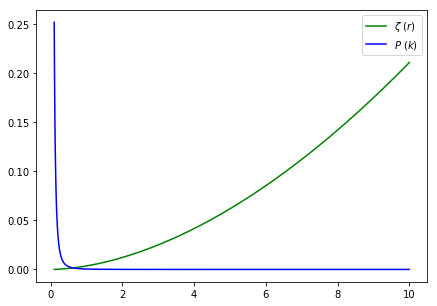

In [6]:
j=complex(0,1) 
x=np.linspace(10,0.1,100)
y=(x**1.77)/5.4
k=1./x
kp=j*(2.5928)*(14.0015/(2*math.pi)**2.77)
p=2.0*(k/kp)**(-2.77)
v=np.linalg.norm(y)
u=np.linalg.norm(abs(p))
plt.figure(figsize=(7,5))
plt.plot(x,y/v,'-' ,label='$\zeta$ $(r)$', color = 'g')
plt.plot(k,abs(p)/u,'-' ,label='$P$ $(k)$', color = 'b')
plt.legend()
plt.autoscale

AttributeError: 'list' object has no attribute 'ndim'

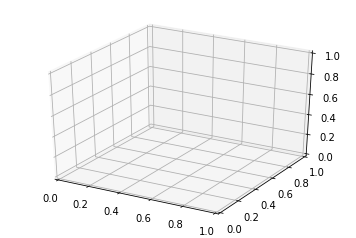

In [7]:
def normalize(X):
    NORM = []
    for i in X:
        norm= (i-np.min(X))/(np.max(X)-np.min(X))
        NORM.append(norm)
    return NORM

    
def f(x, y):
    j=complex(0,1) 
    kp=j*(2.5928)*(14.0015/(4*(math.pi**2))**3.77)
    k=np.sqrt(x ** 2 + y ** 2)
    return abs(2*np.pi*6.0*(k/kp)**(-3.77))

def g(x, y):
    r=np.sqrt(x ** 2 + y ** 2)
    return (r**1.77)/5.4

x=np.linspace(.1,1,100)
y=np.linspace(.1,1,100)
k1=1./x
k2=1./y

x, y = np.meshgrid(x, y)
gy = g(x, y)

k1, k2 = np.meshgrid(k1, k1)
p = f(k1, k2)

gy = normalize(gy)
p = normalize(p)

ax = plt.axes(projection='3d')
ax.plot_surface(k1,k2,gy,cmap='viridis', edgecolor='none')
ax.set_xlabel('$r_{x}$',fontsize = 15)
ax.set_ylabel('$r_{y}$',fontsize = 15)
ax.set_zlabel('$\zeta$ $(r)$',fontsize = 15)
ax.view_init(10, 65)

Usaremos una separacion de 40 y una caja de 1000 de longitud

In [8]:
separacion = 40
longitud = 1000

In [9]:
x1, y1 = construyecaja(longitud, separacion)
x2 = np.random.uniform(0, longitud, len(x1))
y2 = np.random.uniform(0, longitud, len(x1))

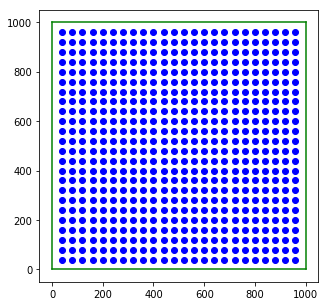

In [10]:
q1 = np.linspace(0, 0, 2)
q2 = np.linspace(0, longitud, 2)
q3 = np.linspace(longitud, longitud, 2)

plt.figure(figsize=(5, 5))
plt.plot(q1, q2, color = 'g')
plt.plot(q3, q2, color = 'g')
plt.plot(q2, q3, color = 'g')
plt.plot(q2, q1, color = 'g')

plt.plot(x1,y1, "bo")

Text(0,0.5,'EJE Y')

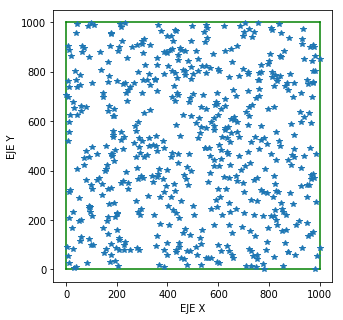

In [11]:
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(q1, q2, color = 'g')
plt.plot(q3, q2, color = 'g')
plt.plot(q2, q3, color = 'g')
plt.plot(q2, q1, color = 'g')
plt.plot(x2,y2, "*")
plt.xlabel("EJE X")
plt.ylabel("EJE Y")

Generamos los histogramas DD, RR y DR con la muestra aleatoria y la ordenada

In [12]:
dmalla0 = distancia(x1, y1) # Calculamos la distancia entre los puntos del arreglo en malla
drandom0 = distancia(x2, y2) # Calculamos la distancia entre los puntos del arreglo de puntos aleatorios
ddr0 = distanciadr(x1, y1, x2, y2) # Calculamos la distancia entre los puntos ordenados y los aleatorios

Buscamos un tamano de bins adecuado

In [13]:
nbins = 18